# Load dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# pip install seaborn

# Load the 'scenery_184_233.txt' dataset and display the image

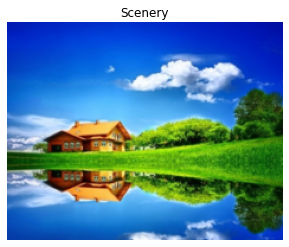

In [3]:
# Load the data and store it inside a matrix X:
X = np.loadtxt('scenery_184_233.txt', delimiter=',', usecols=(0, 1, 2))
# Make sure we have the right format:
X = np.array(X).astype(float)
# Make a copy of X for visualization only and transform it into a displayable image:
im_scenery = np.expand_dims(X, axis=1)
im_scenery = im_scenery.reshape((184, 233, 3))
im_scenery = np.uint8(im_scenery)
# Show the image
plt.figure(1)
plt.axis('off')
plt.imshow(im_scenery)
plt.title("Scenery")
plt.show(block=False)

# Perform image segmentation using K-means clustering

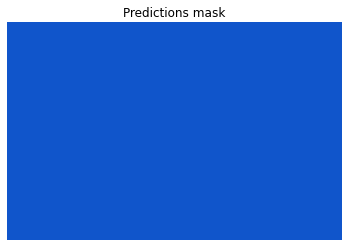

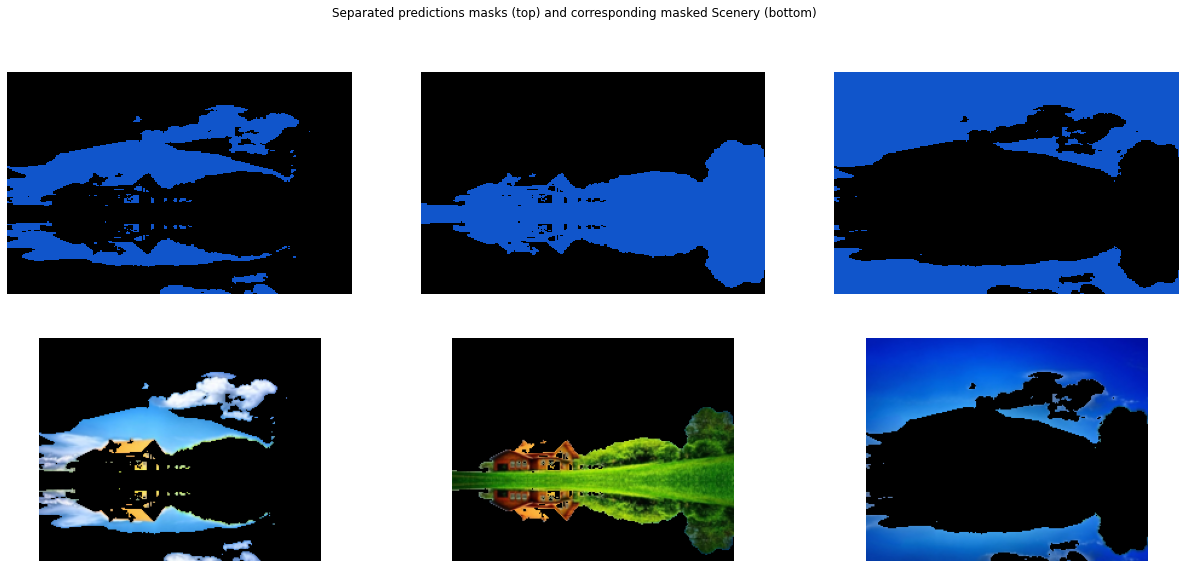

In [4]:
# Set an appropriate number of clusters (print the elbow graph to decide):
num_clusters = 3
# Fit K-mean and get the predictions:
model = KMeans(n_clusters=num_clusters)  
model.fit(X) 
predictions = model.fit_predict(X) 
# Reshape the predictions into a 2D matrix to get what we call a 'mask' in image processing:
predictions_mask = predictions.reshape((184, 233))  
# Show the predictions mask:
plt.figure(3)
sns.heatmap(data=predictions_mask, 
            fmt='d',
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            cmap=[model.cluster_centers_[num_clusters-1]/255 for k in range(num_clusters)]) # the k-th centroid, in a tuple format and normalized (divide by 255)
plt.title("Predictions mask")
plt.show(block=False)
# Show the separated predictions masks and the corresponding masked Scenery:
plt.figure(4, figsize=(21, 9))
for k in range(num_clusters):
    # Extract the separated mask and duplicate it to get a 3D mask:
    predictions_k = predictions_mask == k
    predictions_k_expanded = np.expand_dims(predictions_k, 2)
    predictions_k_tiled = np.tile(predictions_k_expanded, (1, 1, 3))
    # Compute the masked image:
    im = im_scenery * predictions_k_tiled
    # Show the separated mask:
    plt.subplot(2, num_clusters, k + 1)
    sns.heatmap(data=predictions_k.astype(int), 
                fmt='d',
                xticklabels=False,
                yticklabels=False,
                cbar=False,
                cmap=[(0.0, 0.0, 0.0), model.cluster_centers_[num_clusters-1]/255]) # the k-th centroid, in a tuple format and normalized (divide by 255)
    # Show the masked image:
    plt.subplot(2, num_clusters, num_clusters + k + 1)
    plt.axis('off')
    plt.imshow(im)
plt.suptitle("Separated predictions masks (top) and corresponding masked Scenery (bottom)")
plt.show()